In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings; warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import cluster, linear_model

from bunge_utils import FileIO, PSQL

# Importing the proccessed datasets

# Importing the Packages

## Yield Datasets

In [ ]:
df_ayp = pd.read_parquet(
    ('ayp_aoid_trend_Soy_First_Planted.pq'))
df_ayp.drop(columns = ['vector_id','state','meso_iso_x'],axis=1, inplace=True)
display(df_ayp.head())
display(df_ayp.info())

,year,aoi_id,downscaled_production,downscaled_acreage_harvested,downscaled_yield,hp_yield_trend,hp_length,downscaled_pw_trend,dwnscl_vs_pwr_trend,dwnscl_vs_hp_trend,last_executed_on
0,2002,54002,0.252,0.120003,2.09995,2.262721,19,2.367924,-0.267975,-0.162771,"11/27/2023, 20:21:48"
1,2003,54002,1.656,0.690000,2.40000,2.293050,19,2.368615,0.031385,0.106950,"11/27/2023, 20:21:48"
2,2004,54002,0.840,0.350000,2.40000,2.323054,19,2.369306,0.030694,0.076946,"11/27/2023, 20:21:48"
3,2005,54002,0.480,0.400000,1.20000,2.352620,19,2.369997,-1.169997,-1.152620,"11/27/2023, 20:21:48"
4,2006,54002,4.008,1.670000,2.40000,2.381792,19,2.370688,0.029312,0.018208,"11/27/2023, 20:21:48"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35359 entries, 0 to 35358
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          35359 non-null  int64  
 1   aoi_id                        35359 non-null  int64  
 2   downscaled_production         35359 non-null  float64
 3   downscaled_acreage_harvested  35359 non-null  float64
 4   downscaled_yield              35359 non-null  float64
 5   hp_yield_trend                35359 non-null  float64
 6   hp_length                     35359 non-null  int64  
 7   downscaled_pw_trend           35359 non-null  float64
 8   dwnscl_vs_pwr_trend           35359 non-null  float64
 9   dwnscl_vs_hp_trend            35359 non-null  float64
 10  last_executed_on              35359 non-null  object 
dtypes: float64(7), int64(3), object(1)
memory usage: 3.0+ MB


None

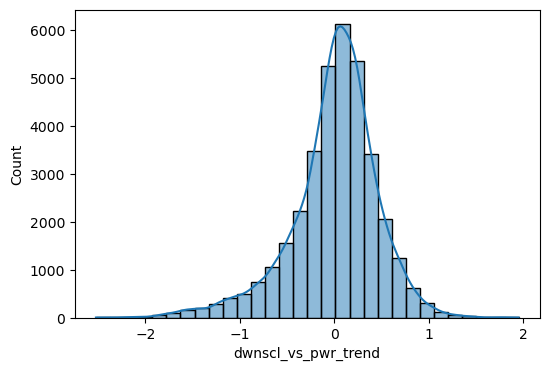

The skewness of the yield residuals is -0.8
The kurtosis of the yield residuals is 1.78


In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.histplot(df_ayp['dwnscl_vs_pwr_trend'], kde = True,bins=30)
plt.show()
print(
    f"The skewness of the yield residuals is {round(df_ayp['dwnscl_vs_pwr_trend'].skew(),2)}")
print(
    f"The kurtosis of the yield residuals is {round(df_ayp['dwnscl_vs_pwr_trend'].kurtosis(),2)}")

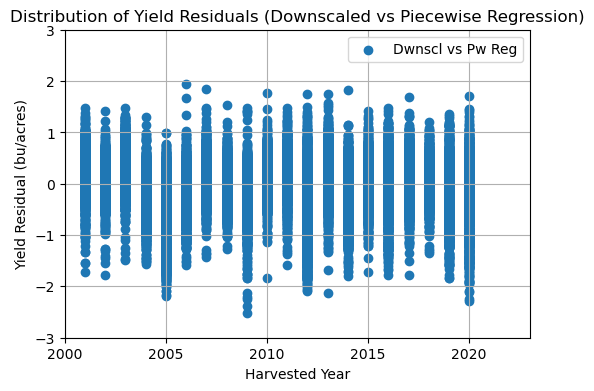

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
plt.scatter('year', 'dwnscl_vs_pwr_trend', data = df_ayp, marker = 'o',
            label = 'Dwnscl vs Pw Reg')
plt.title(
    'Distribution of Yield Residuals (Downscaled vs Piecewise Regression)',
    fontsize = 12)

ax.set(xlim = [2000, 2023], ylim = [-3,3],
       xlabel = 'Harvested Year', ylabel = 'Yield Residual (bu/acres)')

ax.grid()
plt.legend()
plt.show()

In [ ]:
df_ayp[df_ayp['dwnscl_vs_pwr_trend']>1]

,year,aoi_id,downscaled_production,downscaled_acreage_harvested,downscaled_yield,hp_yield_trend,hp_length,downscaled_pw_trend,dwnscl_vs_pwr_trend,dwnscl_vs_hp_trend,last_executed_on
9,2011,54002,1.116976,0.311478,3.586047,2.449159,19,2.374143,1.211904,1.136888,"11/27/2023, 20:21:48"
51,2020,54005,2.004612,0.500000,4.009223,2.490959,18,2.563992,1.445232,1.518264,"11/27/2023, 20:21:48"
53,2003,54007,2.520000,0.700000,3.600000,2.308524,19,2.266510,1.333490,1.291476,"11/27/2023, 20:21:48"
73,2003,54009,4.290000,1.100000,3.900000,2.537096,14,2.628915,1.271085,1.362904,"11/27/2023, 20:21:48"
162,2001,54043,6.750000,2.500000,2.700000,1.760717,20,1.679316,1.020684,0.939283,"11/27/2023, 20:21:48"
...,...,...,...,...,...,...,...,...,...,...,...
34849,2020,59443,50.990729,11.235950,4.538177,3.303586,20,3.234790,1.303387,1.234591,"11/27/2023, 20:21:48"
34869,2020,59444,66.058509,15.321750,4.311421,3.150518,20,3.076020,1.235400,1.160903,"11/27/2023, 20:21:48"
34929,2020,59447,16.452308,4.085800,4.026704,2.821612,20,2.711563,1.315141,1.205092,"11/27/2023, 20:21:48"
35088,2020,59455,28.043707,7.660875,3.660640,2.659397,19,2.588455,1.072185,1.001243,"11/27/2023, 20:21:48"


## Weather datasets

 - Importing the stage-by-stage weather datasets
 - Creating a list of columns that contains the string 'anomaly'.
 - Creating a list of columns which will be the index (aoi_id and harv_yr)
 - Merging these two lists using the '|' operand.

In [ ]:
wx_sbs = pd.read_parquet(
    ('weather_anomaly_brz.pq'))

display(wx_sbs.head())
display(wx_sbs.shape)

,aoi_id,harv_yr,swvl1_mean_anomaly_stg1,swvl1_mean_anomaly_stg2,swvl1_mean_anomaly_stg3,swvl1_mean_anomaly_stg4,swvl2_mean_anomaly_stg1,swvl2_mean_anomaly_stg2,swvl2_mean_anomaly_stg3,swvl2_mean_anomaly_stg4,...,gddxZpos30Zposinf_sum_anomaly_stg4,swvl1ZneginfZpos20_sum_anomaly_stg1,swvl1ZneginfZpos20_sum_anomaly_stg2,swvl1ZneginfZpos20_sum_anomaly_stg3,swvl1ZneginfZpos20_sum_anomaly_stg4,swvl2ZneginfZpos20_sum_anomaly_stg1,swvl2ZneginfZpos20_sum_anomaly_stg2,swvl2ZneginfZpos20_sum_anomaly_stg3,swvl2ZneginfZpos20_sum_anomaly_stg4,doyplant_mean_anomaly_stg1
0,54002,2009,-0.067509,-0.006786,0.042265,0.032727,-0.075981,-0.007303,0.052933,0.038689,...,-28.277421,1.665085,-0.352379,-0.488037,-0.548629,2.011931,-0.433727,-0.585571,-0.585571,22.490566
1,54002,2010,0.039687,0.044591,0.049648,-0.044688,0.047243,0.053293,0.061510,-0.029101,...,-11.401021,-0.482668,-0.548629,-0.509059,-0.016862,-0.582106,-0.585571,-0.585571,-0.266599,4.490566
2,54002,2011,-0.017006,0.016801,0.054712,0.081942,-0.032671,0.010115,0.059829,0.088047,...,-49.755621,-0.162611,-0.542458,-0.548629,-0.548629,-0.071947,-0.585571,-0.585571,-0.585571,4.490566
3,54002,2012,-0.050250,0.066155,-0.031416,-0.048706,-0.054785,0.061588,-0.026811,-0.039792,...,-15.147121,1.155182,-0.548629,0.336576,-0.069676,1.118283,-0.585571,0.001571,-0.303641,24.490566
4,54002,2013,-0.080148,0.037804,0.034735,0.024112,-0.092239,0.040278,0.037830,0.026167,...,-7.543571,1.986011,-0.548629,-0.548629,-0.548629,2.471664,-0.585571,-0.585571,-0.585571,0.490566


(26443, 47)

In [ ]:
df_wx_fs = pd.read_parquet(
    ('weather_stg_brz.pq'))

display(df_wx_fs.head())
display(df_wx_fs.shape)

,aoi_id,harv_yr,swvl1_mean_stg1,swvl1_mean_stg2,swvl1_mean_stg3,swvl1_mean_stg4,swvl2_mean_stg1,swvl2_mean_stg2,swvl2_mean_stg3,swvl2_mean_stg4,...,gddxZpos30Zposinf_sum_stg4,swvl1ZneginfZpos20_sum_stg1,swvl1ZneginfZpos20_sum_stg2,swvl1ZneginfZpos20_sum_stg3,swvl1ZneginfZpos20_sum_stg4,swvl2ZneginfZpos20_sum_stg1,swvl2ZneginfZpos20_sum_stg2,swvl2ZneginfZpos20_sum_stg3,swvl2ZneginfZpos20_sum_stg4,doyplant_mean_stg1
0,54002,2009,0.173939,0.234663,0.283714,0.274176,0.157820,0.226498,0.286733,0.272490,...,-9.78135,2.213714,0.196250,0.060592,0.000000,2.597503,0.151844,0.000000,0.000000,322.0
1,54002,2010,0.281136,0.286039,0.291097,0.196761,0.281043,0.287094,0.295310,0.204699,...,7.09505,0.065961,0.000000,0.039570,0.531767,0.003465,0.000000,0.000000,0.318972,304.0
2,54002,2011,0.224443,0.258250,0.296161,0.323391,0.201130,0.243916,0.293629,0.321848,...,-31.25955,0.386018,0.006171,0.000000,0.000000,0.513624,0.000000,0.000000,0.000000,304.0
3,54002,2012,0.191199,0.307604,0.210033,0.192743,0.179016,0.295388,0.206990,0.194008,...,3.34895,1.703812,0.000000,0.885205,0.478953,1.703854,0.000000,0.587142,0.281930,324.0
4,54002,2013,0.161301,0.279253,0.276184,0.265561,0.141561,0.274079,0.271630,0.259967,...,10.95250,2.534640,0.000000,0.000000,0.000000,3.057236,0.000000,0.000000,0.000000,300.0


(26443, 47)

# Cluster Analysis

In [ ]:
df_ayp_wx_sbs = pd.merge(df_ayp[['year','aoi_id','dwnscl_vs_pwr_trend']],
                         wx_sbs, left_on = ['year','aoi_id'],
                         right_on = ['harv_yr', 'aoi_id'])

df_ayp_wx_sbs = df_ayp_wx_sbs.drop(['harv_yr'],axis=1)

display(df_ayp_wx_sbs.head())
display(df_ayp_wx_sbs.shape)

,year,aoi_id,dwnscl_vs_pwr_trend,swvl1_mean_anomaly_stg1,swvl1_mean_anomaly_stg2,swvl1_mean_anomaly_stg3,swvl1_mean_anomaly_stg4,swvl2_mean_anomaly_stg1,swvl2_mean_anomaly_stg2,swvl2_mean_anomaly_stg3,...,gddxZpos30Zposinf_sum_anomaly_stg4,swvl1ZneginfZpos20_sum_anomaly_stg1,swvl1ZneginfZpos20_sum_anomaly_stg2,swvl1ZneginfZpos20_sum_anomaly_stg3,swvl1ZneginfZpos20_sum_anomaly_stg4,swvl2ZneginfZpos20_sum_anomaly_stg1,swvl2ZneginfZpos20_sum_anomaly_stg2,swvl2ZneginfZpos20_sum_anomaly_stg3,swvl2ZneginfZpos20_sum_anomaly_stg4,doyplant_mean_anomaly_stg1
0,2009,54002,-0.108598,-0.067509,-0.006786,0.042265,0.032727,-0.075981,-0.007303,0.052933,...,-28.277421,1.665085,-0.352379,-0.488037,-0.548629,2.011931,-0.433727,-0.585571,-0.585571,22.490566
1,2010,54002,0.536342,0.039687,0.044591,0.049648,-0.044688,0.047243,0.053293,0.061510,...,-11.401021,-0.482668,-0.548629,-0.509059,-0.016862,-0.582106,-0.585571,-0.585571,-0.266599,4.490566
2,2011,54002,1.211904,-0.017006,0.016801,0.054712,0.081942,-0.032671,0.010115,0.059829,...,-49.755621,-0.162611,-0.542458,-0.548629,-0.548629,-0.071947,-0.585571,-0.585571,-0.585571,4.490566
3,2012,54002,0.857425,-0.050250,0.066155,-0.031416,-0.048706,-0.054785,0.061588,-0.026811,...,-15.147121,1.155182,-0.548629,0.336576,-0.069676,1.118283,-0.585571,0.001571,-0.303641,24.490566
4,2013,54002,0.064159,-0.080148,0.037804,0.034735,0.024112,-0.092239,0.040278,0.037830,...,-7.543571,1.986011,-0.548629,-0.548629,-0.548629,2.471664,-0.585571,-0.585571,-0.585571,0.490566


(21705, 48)

In [ ]:
df_ayp_wx_sbs.columns[df_ayp_wx_sbs.columns.str.contains('gdd')]

Index(['gddxZpos7Zpos30_sum_anomaly_stg1', 'gddxZpos7Zpos30_sum_anomaly_stg2',
       'gddxZpos7Zpos30_sum_anomaly_stg3', 'gddxZpos7Zpos30_sum_anomaly_stg4',
       'gddxZpos30Zposinf_sum_anomaly_stg1',
       'gddxZpos30Zposinf_sum_anomaly_stg2',
       'gddxZpos30Zposinf_sum_anomaly_stg3',
       'gddxZpos30Zposinf_sum_anomaly_stg4'],
      dtype='object')

In [ ]:
df_ayp_wx_sbs['swvl1_pwr2_anomaly_stg1'] = df_ayp_wx_sbs['swvl1_mean_anomaly_stg1']*2
df_ayp_wx_sbs.head()

,year,aoi_id,dwnscl_vs_pwr_trend,swvl1_mean_anomaly_stg1,swvl1_mean_anomaly_stg2,swvl1_mean_anomaly_stg3,swvl1_mean_anomaly_stg4,swvl2_mean_anomaly_stg1,swvl2_mean_anomaly_stg2,swvl2_mean_anomaly_stg3,...,swvl1ZneginfZpos20_sum_anomaly_stg1,swvl1ZneginfZpos20_sum_anomaly_stg2,swvl1ZneginfZpos20_sum_anomaly_stg3,swvl1ZneginfZpos20_sum_anomaly_stg4,swvl2ZneginfZpos20_sum_anomaly_stg1,swvl2ZneginfZpos20_sum_anomaly_stg2,swvl2ZneginfZpos20_sum_anomaly_stg3,swvl2ZneginfZpos20_sum_anomaly_stg4,doyplant_mean_anomaly_stg1,swvl1_pwr2_anomaly_stg1
0,2009,54002,-0.108598,-0.067509,-0.006786,0.042265,0.032727,-0.075981,-0.007303,0.052933,...,1.665085,-0.352379,-0.488037,-0.548629,2.011931,-0.433727,-0.585571,-0.585571,22.490566,-0.135019
1,2010,54002,0.536342,0.039687,0.044591,0.049648,-0.044688,0.047243,0.053293,0.061510,...,-0.482668,-0.548629,-0.509059,-0.016862,-0.582106,-0.585571,-0.585571,-0.266599,4.490566,0.079374
2,2011,54002,1.211904,-0.017006,0.016801,0.054712,0.081942,-0.032671,0.010115,0.059829,...,-0.162611,-0.542458,-0.548629,-0.548629,-0.071947,-0.585571,-0.585571,-0.585571,4.490566,-0.034012
3,2012,54002,0.857425,-0.050250,0.066155,-0.031416,-0.048706,-0.054785,0.061588,-0.026811,...,1.155182,-0.548629,0.336576,-0.069676,1.118283,-0.585571,0.001571,-0.303641,24.490566,-0.100499
4,2013,54002,0.064159,-0.080148,0.037804,0.034735,0.024112,-0.092239,0.040278,0.037830,...,1.986011,-0.548629,-0.548629,-0.548629,2.471664,-0.585571,-0.585571,-0.585571,0.490566,-0.160296


In [ ]:
stage_list = [1,2,3,4]


df_model = df_ayp_wx_sbs[['aoi_id', 'year','dwnscl_vs_pwr_trend']]


for i in stage_list:

    df_model[f'swvl1_pwr2_anomaly_stg{i}'] = df_ayp_wx_sbs[
        f'swvl1_mean_anomaly_stg{i}']**2

    df_model[f'swvl1_pwr2_anomaly_stg{i}'] = df_ayp_wx_sbs[
        f'swvl1_mean_anomaly_stg{i}']**2

    df_model[
        f'swvl1_mean_anomaly_tmax_mean_anomaly_stg{i}'] = (
        (df_ayp_wx_sbs[f'swvl1_mean_anomaly_stg{i}'])*
        (df_ayp_wx_sbs[f'tmax_mean_anomaly_stg{i}']))

    df_model[
        f'swvl2_mean_anomaly_tmax_mean_anomaly_stg{i}'] = (
        (df_ayp_wx_sbs[f'swvl2_mean_anomaly_stg{i}'])*
        (df_ayp_wx_sbs[f'tmax_mean_anomaly_stg{i}']))

    # df_model[
    #     f'swvl3_mean_anomaly_tmax_mean_anomaly_stg{i}'] = (
    #     (df_ayp_wx_sbs[f'swvl3_mean_anomaly_stg{i}'])*
    #     (df_ayp_wx_sbs[f'tmax_mean_anomaly_stg{i}']))

    df_model[
        f'swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg{i}'] = (
        (df_ayp_wx_sbs[f'swvl2_mean_anomaly_stg{i}'])*
        (df_ayp_wx_sbs[f'gddxZpos7Zpos30_sum_anomaly_stg{i}']))

    # df_model[
    #     f'swvl1_mean_anomaly_gddZpos0Zposinf_sum__anomaly_stg{i}'] = (
    #     (df_ayp_wx_sbs[f'swvl1_mean_anomaly_stg{i}_anomaly'])*
    #     (df_ayp_wx_sbs[f'gddZpos0Zposinf_sum_stg{i}_anomaly']))

display(df_model.head())
display(df_model.shape)

,aoi_id,year,dwnscl_vs_pwr_trend,swvl1_pwr2_anomaly_stg1,swvl1_mean_anomaly_tmax_mean_anomaly_stg1,swvl2_mean_anomaly_tmax_mean_anomaly_stg1,swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg1,swvl1_pwr2_anomaly_stg2,swvl1_mean_anomaly_tmax_mean_anomaly_stg2,swvl2_mean_anomaly_tmax_mean_anomaly_stg2,swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg2,swvl1_pwr2_anomaly_stg3,swvl1_mean_anomaly_tmax_mean_anomaly_stg3,swvl2_mean_anomaly_tmax_mean_anomaly_stg3,swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg3,swvl1_pwr2_anomaly_stg4,swvl1_mean_anomaly_tmax_mean_anomaly_stg4,swvl2_mean_anomaly_tmax_mean_anomaly_stg4,swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg4
0,54002,2009,-0.108598,0.004558,-0.025838,-0.029080,-20.697095,0.000046,0.004136,0.004451,2.191147,0.001786,-0.018786,-0.023527,14.510703,0.001071,-0.060228,-0.071201,-11.715993
1,54002,2010,0.536342,0.001575,-0.023951,-0.028511,13.544712,0.001988,-0.009060,-0.010829,-15.198998,0.002465,-0.031781,-0.039374,17.556781,0.001997,0.006823,0.004443,8.771851
2,54002,2011,1.211904,0.000289,0.006352,0.012204,-8.192812,0.000282,-0.008896,-0.005356,-2.927895,0.002993,-0.033672,-0.036821,17.415765,0.006714,-0.326796,-0.351146,-28.841933
3,54002,2012,0.857425,0.002525,-0.054112,-0.058995,-15.219387,0.004376,-0.181238,-0.168727,-19.350547,0.000987,-0.012374,-0.010560,-7.584732,0.002372,0.025682,0.020982,12.356182
4,54002,2013,0.064159,0.006424,-0.186378,-0.214495,-28.890860,0.001429,0.002362,0.002517,-11.373742,0.001207,-0.041598,-0.045305,10.264328,0.000581,0.005620,0.006098,-7.405029


(21705, 19)

In [ ]:
aoi_list = df_ayp_wx_sbs.aoi_id.unique()

wx_vars = df_model.columns[3:]

model = linear_model.LinearRegression()

coeff, wx, aoi_id = [], [], []

for i in np.arange(len(aoi_list)):
    for j in wx_vars:
        df_temp= df_model[df_model['aoi_id']==aoi_list[i]]

        y_var = df_temp[['dwnscl_vs_pwr_trend']]
        x_var = df_temp[[j]]

        model.fit(y_var,x_var)

        coeff.append(model.coef_[0][0])
        aoi_id.append(aoi_list[i])
        wx.append(j)

df_coeff = pd.DataFrame({'aoi_id':aoi_id, 'wx_var':wx,
                           'coeff':coeff})

df_coeff = df_coeff.pivot(index = ['aoi_id'], columns = 'wx_var',
                                       values = ['coeff']).reset_index()

df_coeff.columns = ['_'.join(i).strip('_') for i in df_coeff.columns.values]

,aoi_id,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg1,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg2,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg3,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg4,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg1,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg2,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg3,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg4,coeff_swvl1_pwr2_anomaly_stg1,coeff_swvl1_pwr2_anomaly_stg2,coeff_swvl1_pwr2_anomaly_stg3,coeff_swvl1_pwr2_anomaly_stg4,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg1,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg2,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg3,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg4
0,54002,-0.247283,-9.185108,8.911698,2.538390,0.001457,-0.009877,0.019312,-0.042334,-0.000109,0.000188,0.000256,0.001130,0.005810,-0.009684,0.012696,-0.050648
1,54004,4.286175,1.588448,1.988666,2.334590,-0.000301,-0.046248,-0.020044,-0.049880,-0.001056,0.001134,0.000546,0.003348,-0.004209,-0.031356,-0.023594,-0.031680
2,54005,-1.179261,-0.627201,-2.372732,6.195955,-0.004281,-0.003423,-0.004337,-0.004900,0.000215,0.000511,-0.000004,0.001242,-0.005749,-0.004623,-0.006711,-0.000779
3,54007,9.206260,-3.406954,-12.635701,-10.064744,-0.004834,0.044986,0.033392,-0.039541,-0.003469,0.000217,-0.001433,-0.001206,-0.010569,0.041853,0.052404,-0.017870
4,54009,4.129345,72.091525,-37.322241,51.242098,0.120606,-0.042682,0.059973,-0.257432,-0.011148,0.005242,-0.005490,0.016401,0.114579,-0.084529,0.067492,-0.195265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,59542,-6.178447,-5.384113,-4.494848,7.036025,-0.016155,-0.026867,-0.001861,-0.031911,0.000204,0.000216,-0.000172,0.000720,-0.020564,-0.037466,-0.000169,-0.033251
1903,59554,3.615640,-2.147302,0.064482,0.745771,0.022670,-0.005184,0.000503,-0.004196,-0.000522,-0.000003,-0.000009,-0.000005,0.026817,-0.008643,-0.000499,-0.006221
1904,59557,2.524418,-0.475088,0.450507,-0.958863,-0.000444,-0.003944,-0.003744,-0.005778,0.000022,0.000020,0.000019,0.000024,0.001083,-0.005292,-0.005183,-0.008474
1905,59563,5.201967,-0.172066,-0.701710,0.667761,0.026636,0.011382,-0.006972,-0.012172,-0.000570,-0.000126,0.000016,-0.000002,0.033757,0.014743,-0.008487,-0.015818


In [ ]:
aoi_list = df_ayp_wx_sbs.aoi_id.unique()

# the mean of the planting date, sum of the ppt, t mean

wx_vars = df_model.columns[3:]

model = linear_model.LinearRegression()

coeff, wx, aoi_id = [], [], []

for i in np.arange(len(aoi_list)):
    for j in wx_vars:
        df_temp = df_model[df_model['aoi_id']==aoi_list[i]]

        y_clstr = df_temp[['dwnscl_vs_pwr_trend']]
        x_clstr = df_temp[[j]]

        model.fit(x_clstr,y_clstr)
        coeff.append(model.coef_[0][0])
        aoi_id.append(aoi_list[i])
        wx.append(j)

df_cluster = pd.DataFrame({'aoi_id':aoi_id, 'wx_var':wx,
                           'coeff':coeff})

df_cluster = df_cluster.pivot(index=['aoi_id'], columns = ['wx_var'],
                              values = ['coeff']).reset_index()

df_cluster.columns = ['_'.join(i).strip('_') for i in df_cluster.columns.values]

#cluster will be formed based on which aoi's react similarly to the wx_variables.

,aoi_id,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg1,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg2,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg3,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg4,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg1,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg2,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg3,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg4,coeff_swvl1_pwr2_anomaly_stg1,coeff_swvl1_pwr2_anomaly_stg2,coeff_swvl1_pwr2_anomaly_stg3,coeff_swvl1_pwr2_anomaly_stg4,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg1,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg2,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg3,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg4
0,54002,-0.000495,-0.037308,0.036722,0.009247,0.190568,-1.254098,9.526819,-2.124859,-11.869389,41.123822,129.792369,154.170055,0.483676,-1.527073,8.034816,-2.278648
1,54004,0.013471,0.002428,0.005475,0.003213,-0.186170,-1.496852,-4.009567,-7.166891,-217.299469,30.943929,107.301271,109.712896,-2.271998,-1.415442,-3.319513,-5.492205
2,54005,-0.008221,-0.004361,-0.023540,0.030375,-9.729093,-0.436994,-4.549782,-1.247393,38.633466,54.445610,-3.229315,134.139904,-13.086810,-0.924603,-5.900688,-0.222952
3,54007,0.001583,-0.000683,-0.003220,-0.001972,-0.098050,0.204784,0.860857,-0.482718,-20.417785,0.962413,-30.803855,-10.792864,-0.176306,0.201504,1.085849,-0.208849
4,54009,0.000347,0.006257,-0.015462,0.004617,3.093717,-0.756539,0.981622,-1.013400,-18.062320,48.810320,-40.823489,36.414228,2.772289,-1.308874,1.082300,-0.986327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,59542,-0.005226,-0.033741,-0.059706,0.017705,-0.674911,-10.290927,-0.435746,-9.746600,28.231353,1185.043249,-382.398721,519.600396,-0.498644,-7.699879,-0.024769,-8.108108
1903,59554,0.007819,-0.038979,0.002361,0.014860,1.910732,-6.794487,0.318642,-8.120430,-138.391790,-30.238026,-74.571893,-60.465708,1.325730,-6.740242,-0.197491,-5.905721
1904,59557,0.010580,-0.076495,0.192216,-0.128062,-0.138063,-20.539613,-20.636887,-16.765963,35.598229,3321.128588,4142.732889,2595.128450,0.152427,-15.753471,-14.544005,-12.336778
1905,59563,0.010725,-0.001601,-0.037240,0.016543,1.373828,22.249513,-6.792594,-10.964547,-79.919640,-1436.301483,228.470178,-12.889027,1.094813,15.109734,-4.967649,-8.385131


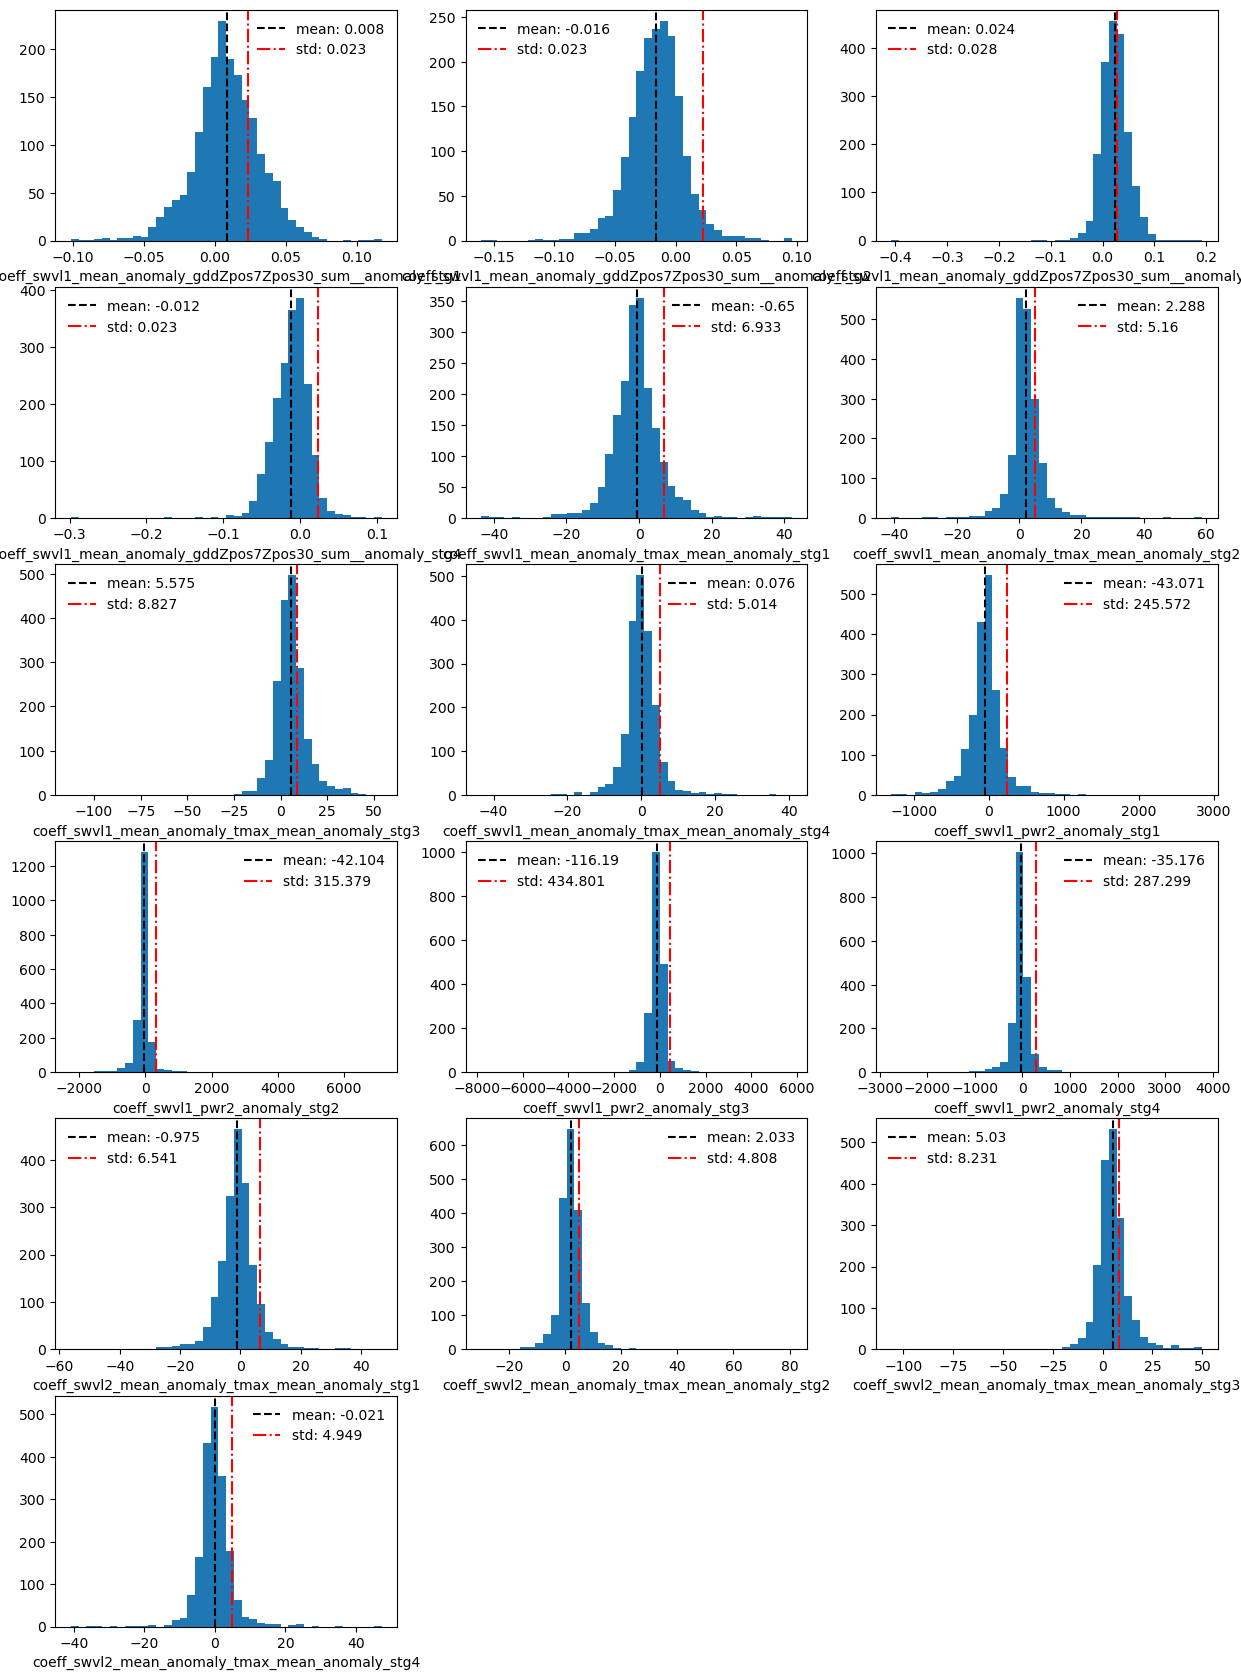

In [ ]:
cols_cluster = df_cluster.columns[1:]

plt.figure(figsize = (15,21))

for i in np.arange(len(cols_cluster)):

    plt.subplot(6,3,i+1)

    plt.hist(df_cluster[cols_cluster[i]],bins=40)

    plt.xlabel(cols_cluster[i])

    plt.axvline(df_cluster[cols_cluster[i]].mean(),color = 'black',ls = '--',
               label = f'mean: {round(df_cluster[cols_cluster[i]].mean(),3)}')

    plt.axvline(df_cluster[cols_cluster[i]].std(),color = 'red',ls = 'dashdot',
               label = f'std: {round(df_cluster[cols_cluster[i]].std(),3)}')

    plt.legend(frameon = False)

plt.show()

In [ ]:
cluster_cols = df_cluster.columns[1:]

df_cluster_std = pd.DataFrame({'aoi_id': aoi_list})

for i in cluster_cols:

    df_cluster_std[f'{i}_standardized'] = (
        df_cluster[f'{i}'] - df_cluster[f'{i}'].mean())/(
        df_cluster[f'{i}'].std())

df_cluster_std

,aoi_id,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg1_standardized,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg2_standardized,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg3_standardized,coeff_swvl1_mean_anomaly_gddZpos7Zpos30_sum__anomaly_stg4_standardized,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg1_standardized,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg2_standardized,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg3_standardized,coeff_swvl1_mean_anomaly_tmax_mean_anomaly_stg4_standardized,coeff_swvl1_pwr2_anomaly_stg1_standardized,coeff_swvl1_pwr2_anomaly_stg2_standardized,coeff_swvl1_pwr2_anomaly_stg3_standardized,coeff_swvl1_pwr2_anomaly_stg4_standardized,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg1_standardized,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg2_standardized,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg3_standardized,coeff_swvl2_mean_anomaly_tmax_mean_anomaly_stg4_standardized
0,54002,-0.377898,-0.944954,0.468715,0.894873,0.121199,-0.686383,0.447698,-0.438826,0.127055,0.263896,0.565734,0.659055,0.222970,-0.740279,0.365019,-0.456132
1,54004,0.216406,0.806521,-0.651680,0.636804,0.066862,-0.733429,-1.085828,-1.444351,-0.709482,0.231618,0.514007,0.504313,-0.198305,-0.717064,-1.014486,-1.105401
2,54005,-0.706663,0.507273,-1.692092,1.798540,-1.309496,-0.528028,-1.147028,-0.263835,0.332709,0.306137,0.259798,0.589336,-1.851627,-0.614985,-1.328088,-0.040798
3,54007,-0.289469,0.669400,-0.963471,0.415043,0.079572,-0.403650,-0.534061,-0.111337,0.092245,0.136553,0.196379,0.084870,0.122075,-0.380791,-0.479252,-0.037948
4,54009,-0.342076,0.975294,-1.402418,0.696874,0.539915,-0.589955,-0.520380,-0.217170,0.101837,0.288269,0.173335,0.249183,0.572844,-0.694901,-0.479684,-0.195030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,59527,-0.579219,-0.787735,-2.988898,1.256609,-0.003628,-2.437726,-0.680952,-1.958819,0.290351,3.891025,-0.612255,1.931004,0.072797,-2.024022,-0.614188,-1.633920
1903,59539,-0.024092,-1.018632,-0.763356,1.134960,0.369295,-1.760113,-0.595488,-1.634514,-0.388160,0.037623,0.095717,-0.088025,0.351700,-1.824449,-0.635173,-1.188948
1904,59554,0.093411,-2.672246,6.044275,-4.977827,0.073801,-4.423927,-2.969523,-3.358679,0.320349,10.664103,9.795103,9.155272,0.172330,-3.698907,-2.378215,-2.488283
1905,59557,0.099573,0.628912,-2.183333,1.206913,0.291858,3.868631,-1.401114,-2.201712,-0.150054,-4.420709,0.792684,0.077574,0.316398,2.719636,-1.214727,-1.689889
